In [22]:
#input the library 
library(clusterProfiler)
library(enrichplot)
library(ggplot2)
library(org.Dm.eg.db)
library(DOSE)
library(GOSemSim)

GOSemSim v2.28.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use GOSemSim in published research, please cite:
- Guangchuang Yu. Gene Ontology Semantic Similarity Analysis Using GOSemSim. In: Kidder B. (eds) Stem Cell Transcriptional Networks. Methods in Molecular Biology, 2020, 2117:207-215. Humana, New York, NY. doi:10.1007/978-1-0716-0301-7_11
- Guangchuang Yu, Fei Li, Yide Qin, Xiaochen Bo, Yibo Wu, Shengqi Wang. GOSemSim: an R package for measuring semantic similarity among GO terms and gene products Bioinformatics 2010, 26(7):976-978. doi:10.1093/bioinformatics/btq064




Attaching package: ‘GOSemSim’


The following objects are masked from ‘package:DOSE’:

    clusterSim, geneSim, mclusterSim




In [4]:
df <- read.csv("deg.csv",header = TRUE,sep = ",")
head(df)
original_gene_list <- df$logFC
head(original_gene_list)

,id,entrez,logFC
,<chr>,<int>,<dbl>
1,FBgn0001254,38432,10.967860
2,FBgn0037836,41298,-10.193363
3,FBgn0039795,43642,9.848162
4,FBgn0024294,45041,7.469046
5,FBgn0001255,48239,6.685115
6,FBgn0264562,31162,6.440536


[1]  10.967860 -10.193363   9.848162   7.469046   6.685115   6.440536

In [5]:
names(original_gene_list) <- df$id
head(original_gene_list)
gene_list <- na.omit(original_gene_list)
head(gene_list)
gene_list = sort(gene_list,decreasing = TRUE)
head(gene_list)

FBgn0001254 FBgn0037836 FBgn0039795 FBgn0024294 FBgn0001255 FBgn0264562 
  10.967860  -10.193363    9.848162    7.469046    6.685115    6.440536

FBgn0001254 FBgn0037836 FBgn0039795 FBgn0024294 FBgn0001255 FBgn0264562 
  10.967860  -10.193363    9.848162    7.469046    6.685115    6.440536

FBgn0030836 FBgn0034318 FBgn0001254 FBgn0039470 FBgn0052475 FBgn0031248 
   11.15127    11.04239    10.96786    10.84958    10.26213    10.20295

In [6]:
gse <- gseGO(geneList=gene_list, 
             ont ="ALL", 
             keyType = "FLYBASE", 
             nPerm = 10000, 
             minGSSize = 3, 
             maxGSSize = 800, 
             pvalueCutoff = 0.05, 
             verbose = TRUE, 
             OrgDb = org.Dm.eg.db, 
             pAdjustMethod = "none")
head(gse)

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
leading edge analysis...

done...



,ONTOLOGY,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GO:0019538,BP,GO:0019538,protein metabolic process,310,0.3506237,1.591500,0.0001152074,0.0001152074,0.04722461,231,"tags=17%, list=13%, signal=18%",FBgn0031248/FBgn0035887/FBgn0035665/FBgn0003357/FBgn0250815/FBgn0035667/FBgn0003356/FBgn0035886/FBgn0051198/FBgn0040060/FBgn0032144/FBgn0036024/FBgn0038701/FBgn0036023/FBgn0039777/FBgn0011822/FBgn0030777/FBgn0031653/FBgn0031141/FBgn0011834/FBgn0035666/FBgn0035781/FBgn0043575/FBgn0035154/FBgn0039778/FBgn0035779/FBgn0259998/FBgn0024294/FBgn0003358/FBgn0001285/FBgn0051233/FBgn0031654/FBgn0004577/FBgn0029804/FBgn0010358/FBgn0043576/FBgn0001227/FBgn0030774/FBgn0036015/FBgn0020906/FBgn0003089/FBgn0035670/FBgn0265011/FBgn0036421/FBgn0030775/FBgn0012037/FBgn0029856/FBgn0029809/FBgn0036022/FBgn0039887/FBgn0013278/FBgn0052483
GO:0016787,MF,GO:0016787,hydrolase activity,194,0.5628072,2.452997,0.0001213151,0.0001213151,0.04722461,284,"tags=35%, list=16%, signal=33%",FBgn0039470/FBgn0031248/FBgn0035887/FBgn0035665/FBgn0003357/FBgn0250815/FBgn0035667/FBgn0003356/FBgn0035886/FBgn0051198/FBgn0040060/FBgn0032144/FBgn0036024/FBgn0038701/FBgn0036023/FBgn0039777/FBgn0011822/FBgn0031653/FBgn0031141/FBgn0011834/FBgn0035666/FBgn0038845/FBgn0035781/FBgn0043575/FBgn0002571/FBgn0035154/FBgn0039778/FBgn0035779/FBgn0036996/FBgn0020506/FBgn0000079/FBgn0259998/FBgn0000078/FBgn0003358/FBgn0001285/FBgn0033294/FBgn0051233/FBgn0034710/FBgn0034588/FBgn0036321/FBgn0031654/FBgn0029804/FBgn0010358/FBgn0002569/FBgn0034712/FBgn0004430/FBgn0043576/FBgn0259101/FBgn0004431/FBgn0020906/FBgn0033999/FBgn0035670/FBgn0265011/FBgn0051792/FBgn0022700/FBgn0012037/FBgn0036022/FBgn0013278/FBgn0052483/FBgn0034438/FBgn0003996/FBgn0031741/FBgn0029720/FBgn0033365/FBgn0263236/FBgn0038180/FBgn0037678
GO:0140096,MF,GO:0140096,"catalytic activity, acting on a protein",161,0.4877155,2.082424,0.0001241927,0.0001241927,0.04722461,271,"tags=27%, list=15%, signal=25%",FBgn0031248/FBgn0035887/FBgn0035665/FBgn0003357/FBgn0250815/FBgn0035667/FBgn0003356/FBgn0035886/FBgn0051198/FBgn0040060/FBgn0032144/FBgn0036024/FBgn0038701/FBgn0036023/FBgn0039777/FBgn0011822/FBgn0031653/FBgn0031141/FBgn0011834/FBgn0035666/FBgn0035781/FBgn0035154/FBgn0039778/FBgn0035779/FBgn0259998/FBgn0003358/FBgn0001285/FBgn0051233/FBgn0031654/FBgn0029804/FBgn0010358/FBgn0020906/FBgn0035670/FBgn0265011/FBgn0036421/FBgn0012037/FBgn0029809/FBgn0036022/FBgn0052483/FBgn0034438/FBgn0031741/FBgn0033365/FBgn0263236
GO:0006508,BP,GO:0006508,proteolysis,138,0.5195692,2.174761,0.0001274860,0.0001274860,0.04722461,271,"tags=35%, list=15%, signal=32%",FBgn0031248/FBgn0035887/FBgn0035665/FBgn0003357/FBgn0250815/FBgn0035667/FBgn0003356/FBgn0035886/FBgn0051198/FBgn0040060/FBgn0032144/FBgn0036024/FBgn0038701/FBgn0036023/FBgn0039777/FBgn0011822/FBgn0030777/FBgn0031653/FBgn0031141/FBgn0011834/FBgn0035666/FBgn0035781/FBgn0035154/FBgn0039778/FBgn0035779/FBgn0259998/FBgn0024294/FBgn0003358/FBgn0001285/FBgn0051233/FBgn0031654/FBgn0029804/FBgn0010358/FBgn0030774/FBgn0036015/FBgn0020906/FBgn0003089/FBgn0035670/FBgn0265011/FBgn0030775/FBgn0012037/FBgn0029856/FBgn0036022/FBgn0052483/FBgn0034438/FBgn0031741/FBgn0033365/FBgn0263236
GO:0008233,MF,GO:0008233,peptidase activity,76,0.6665611,2.552515,0.0001381788,0.0001381788,0.04722461,284,"tags=55%, list=16%, signal=48%",FBgn0031248/FBgn0035887/FBgn0035665/FBgn0003357/FBgn0250815/FBgn0035667/FBgn0003356/FBgn0035886/FBgn0051198/FBgn0040060/FBgn0032144/FBgn0036024/FBgn0038701/FBgn0036023/FBgn0039777/FBgn0011822/FBgn0031653/FBgn0031141/FBgn0011834/FBgn0035666/FBgn0035781/FBgn0035154/FBgn0039778/FBgn0035779/FBgn0259998/FBgn0003358/FBgn0001285/FBgn0051233/FBgn0031654/FBgn0029804/FBgn0010358/FBgn0020906/FBgn0035670/FBgn0265011/FBgn0012037/FBgn0036022/FBgn0052483/FBgn0034438/FBgn0031741/FBgn0033365/FBgn0263236/FBgn0037678
GO:0004175,MF,GO:0004175,endopeptidase activity,56,0.6820801,2.477

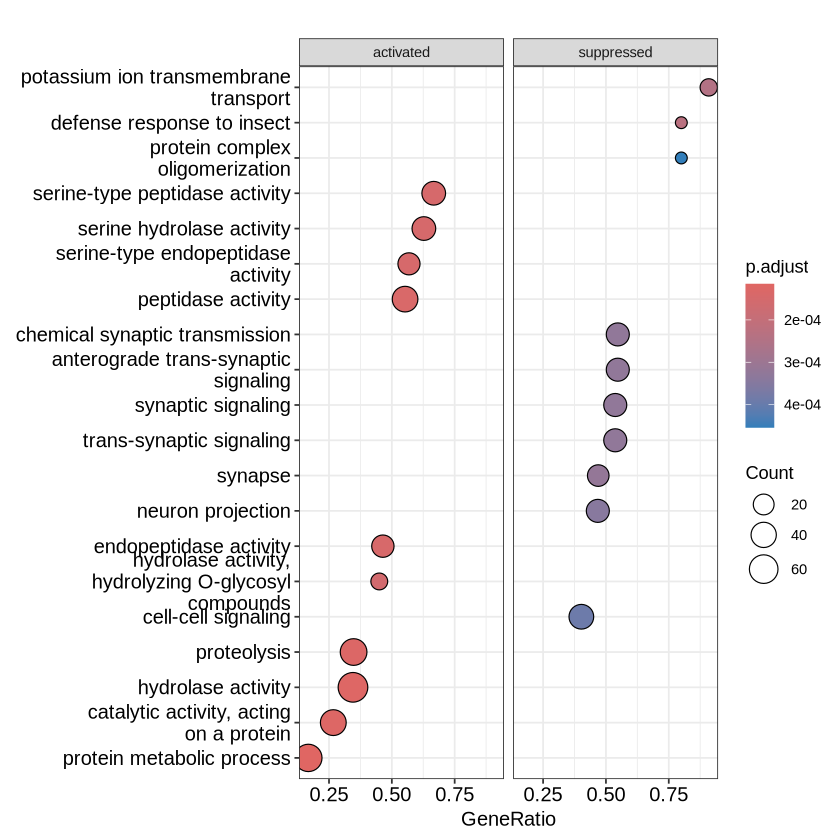

In [7]:
require(DOSE)
dotplot(gse, showCategory=10, split=".sign") + facet_grid(.~.sign)

Picking joint bandwidth of 0.88



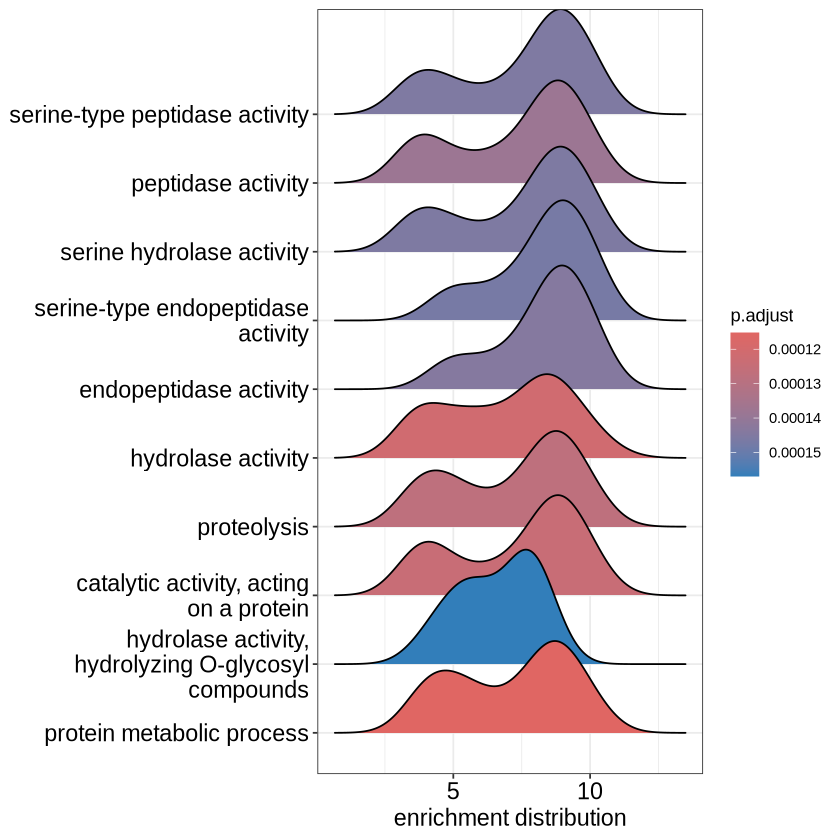

In [12]:
ridgeplot(gse,showCategory = 10) + labs(x = "enrichment distribution")

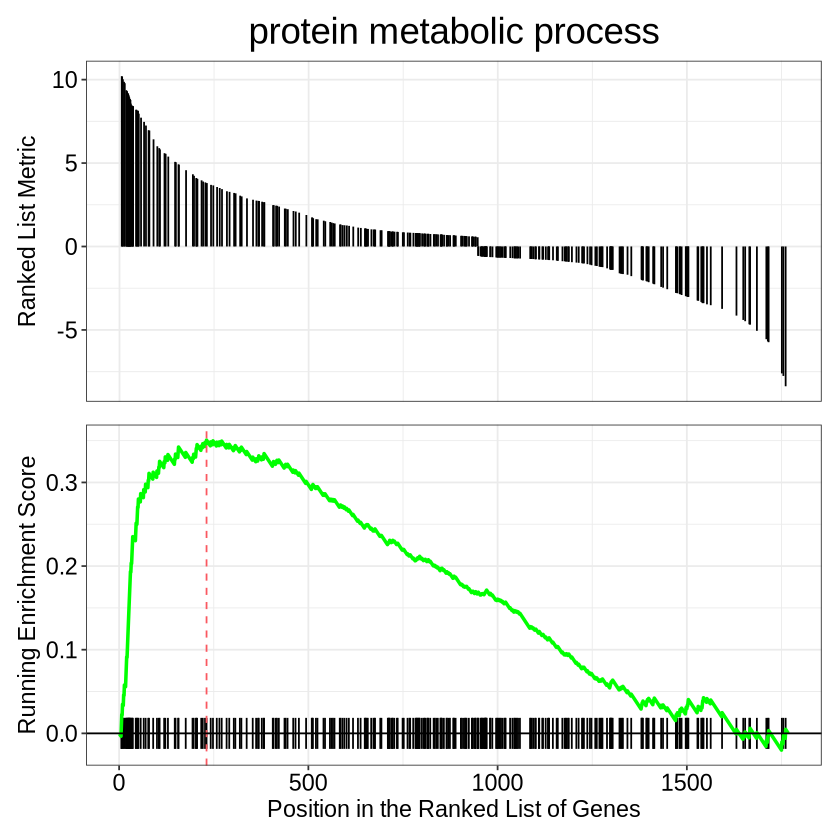

In [13]:
gseaplot(gse, by = "all", title = gse$Description[1], geneSetID = 1)

Warning message in cnetplot.enrichResult(x, ...):
“Use 'color.params = list(foldChange = your_value)' instead of 'foldChange'.
 The foldChange parameter will be removed in the next version.”
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


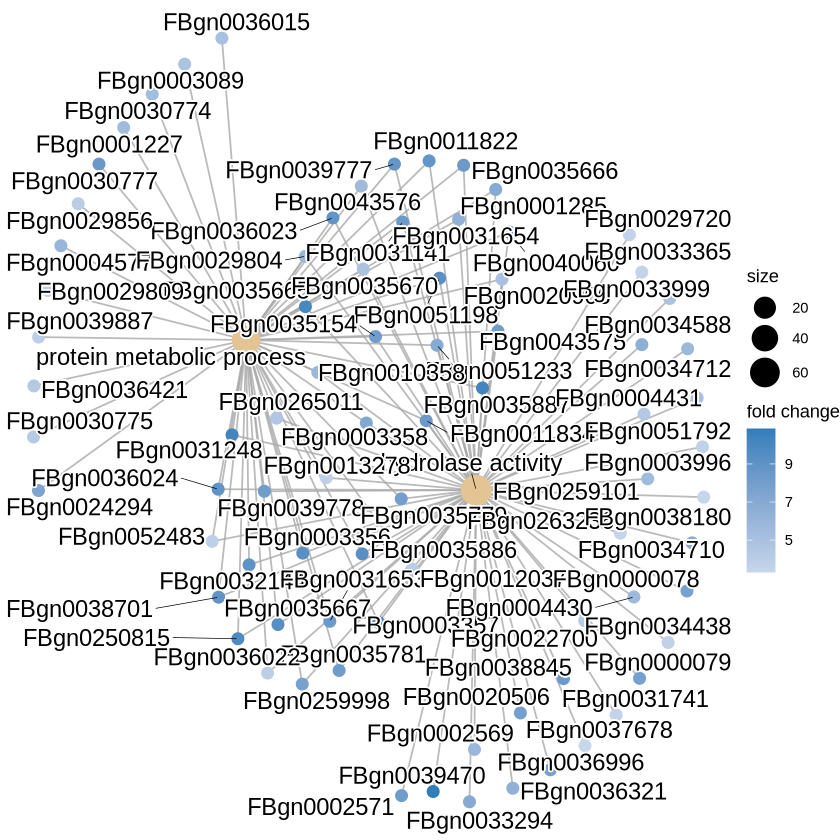

In [14]:
cnetplot(gse, categorySize="pvalue", foldChange=gene_list, showCategory = 2)

In [15]:
gene_id <- df$logFC
head(gene_id)
names(gene_id) <- df$entrez
head(gene_id)

[1]  10.967860 -10.193363   9.848162   7.469046   6.685115   6.440536

38432      41298      43642      45041      48239      31162 
 10.967860 -10.193363   9.848162   7.469046   6.685115   6.440536

In [16]:
all = read.table("result_id.txt", header = TRUE,sep = " ") #全遺伝子（バックグラウンドとして使う）
head(all, n=3)

allgene <- bitr(all$name, fromType="FLYBASE", toType="ENTREZID", OrgDb="org.Dm.eg.db") #比較できるようにIDをFLYBASE_GENE_IDからENTREZIDに変換。
head(allgene)

,name,logFC,logCPM,PValue,FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,FBgn0001254,10.967860,10.495947,3.162581e-196,3.296674e-192
2,FBgn0037836,-10.193363,6.846906,2.257809e-163,1.176770e-159
3,FBgn0039795,9.848162,5.966366,1.173624e-132,4.077952e-129


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(all$name, fromType = "FLYBASE", toType = "ENTREZID", OrgDb = "org.Dm.eg.db"):
“3.47% of input gene IDs are fail to map...”


,FLYBASE,ENTREZID
,<chr>,<chr>
1,FBgn0001254,38432
2,FBgn0037836,41298
3,FBgn0039795,43642
4,FBgn0024294,45041
5,FBgn0001255,48239
6,FBgn0264562,31162


In [26]:
x <- read.csv("induction_id.txt", header=TRUE,sep=",")#上の方でlogFC>=0条件で抽出したデータを読み込む。
head(x,n=3)
induction <- bitr(x$name, fromType="FLYBASE", toType="ENTREZID", OrgDb="org.Dm.eg.db") #比較できるようにIDをLYBASE_GENE_IDからENTREZIDに変換。
head(induction)
egoBP <- enrichGO(gene = induction[,2], 
　universe = allgene[,2], #allgeneと比較
　OrgDb = org.Dm.eg.db, 
　ont = "CC",
　pAdjustMethod = "BH",
　pvalueCutoff = 0.01, 
　qvalueCutoff = 0.05, 
　readable = TRUE)
head(egoBP)#show the result

,name,logFC,logCPM,PValue,FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,FBgn0001254,10.967860,10.495947,3.162581e-196,3.296674e-192
2,FBgn0039795,9.848162,5.966366,1.173624e-132,4.077952e-129
3,FBgn0024294,7.469046,6.534679,8.673341e-115,2.260273e-111


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(x$name, fromType = "FLYBASE", toType = "ENTREZID", OrgDb = "org.Dm.eg.db"):
“3.56% of input gene IDs are fail to map...”


,FLYBASE,ENTREZID
,<chr>,<chr>
1,FBgn0001254,38432
2,FBgn0039795,43642
3,FBgn0024294,45041
4,FBgn0001255,48239
5,FBgn0264562,31162
6,FBgn0265011,35904


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0005615,GO:0005615,extracellular space,67/718,379/7969,3.639101e-08,7.573009e-06,7.524337e-06,Spn100A/Spn43Aa/Np/Ance/CG5758/Cht5/CG3097/Fkbp14/Sod3/CG2016/spz6/CG10359/CG4914/Nep2/ltl/CG2852/CG17919/CG5639/NT1/CG32055/CG43366/CG8420/Mp/CG43333/CG42342/l(2)k05911/Pdi/Jon99Ciii/Toll-7/Ag5r2/CG17271/Cpr51A/Amy-p/tsl/hh/Amy-d/peg/spz4/CG17633/Fst/CG5390/sca/CG6296/Ance-2/CG8560/CG8483/Wnt5/LysS/CG8562/Amyrel/lbk/mesh/CG7231/CG31997/CG16820/CG8093/betaGlu/CG10663/Ag5r/trn/Sdr/CG3868/LysX/CG34276/CG8460/CG9673/Cht4,67
GO:0031012,GO:0031012,extracellular matrix,36/718,154/7969,5.998980e-08,7.573009e-06,7.524337e-06,CG5758/Cpr64Aa/Cpr12A/Vajk2/CG10359/Vajk3/Cpr78E/NetA/CG5639/obst-A/Cpr31A/TwdlT/Mp/Vajk4/CG43333/CG17211/Cpr35B/CG42342/Toll-7/Cpr49Ac/Cpr51A/Cpr56F/Mur29B/sca/Peritrophin-15a/CG5455/Lcp3/lbk/Ppn/CG15515/TwdlE/CG15756/Cpr97Ea/trn/CG2150/Cpr97Eb,36
GO:0030312,GO:0030312,external encapsulating structure,37/718,162/7969,7.498028e-08,7.573009e-06,7.524337e-06,CG5758/Cpr64Aa/Cpr12A/Vajk2/CG10359/Vajk3/Cpr78E/NetA/CG5639/obst-A/Cpr31A/TwdlT/Mp/Vajk4/CG43333/Pxd/CG17211/Cpr35B/CG42342/Toll-7/Cpr49Ac/Cpr51A/Cpr56F/Mur29B/sca/Peritrophin-15a/CG5455/Lcp3/lbk/Ppn/CG15515/TwdlE/CG15756/Cpr97Ea/trn/CG2150/Cpr97Eb,37
GO:0062129,GO:0062129,chitin-based extracellular matrix,19/718,62/7969,1.128276e-06,8.546691e-05,8.491761e-05,Cpr64Aa/Cpr12A/Vajk2/Vajk3/Cpr78E/obst-A/Cpr31A/Vajk4/Cpr35B/Cpr49Ac/Cpr51A/Cpr56F/Peritrophin-15a/Lcp3/CG15515/CG15756/Cpr97Ea/CG2150/Cpr97Eb,19


preparing gene to GO mapping data...

preparing IC data...

Warning message:
“'emapplot_cluster' has been replaced by `emapplot`, 
        it will be removed in the next version”
Warning message in emapplot.enrichResult(x, showCategory = showCategory, ...):
“Use 'edge.params = list(show = your_value)' instead of 'with_edge'.
 The with_edge parameter will be removed in the next version.”
Warning message in emapplot.enrichResult(x, showCategory = showCategory, ...):
“Use 'cluster.params = list(cluster = your_value)' instead of 'group_category'.
 The group_category parameter will be removed in the next version.”


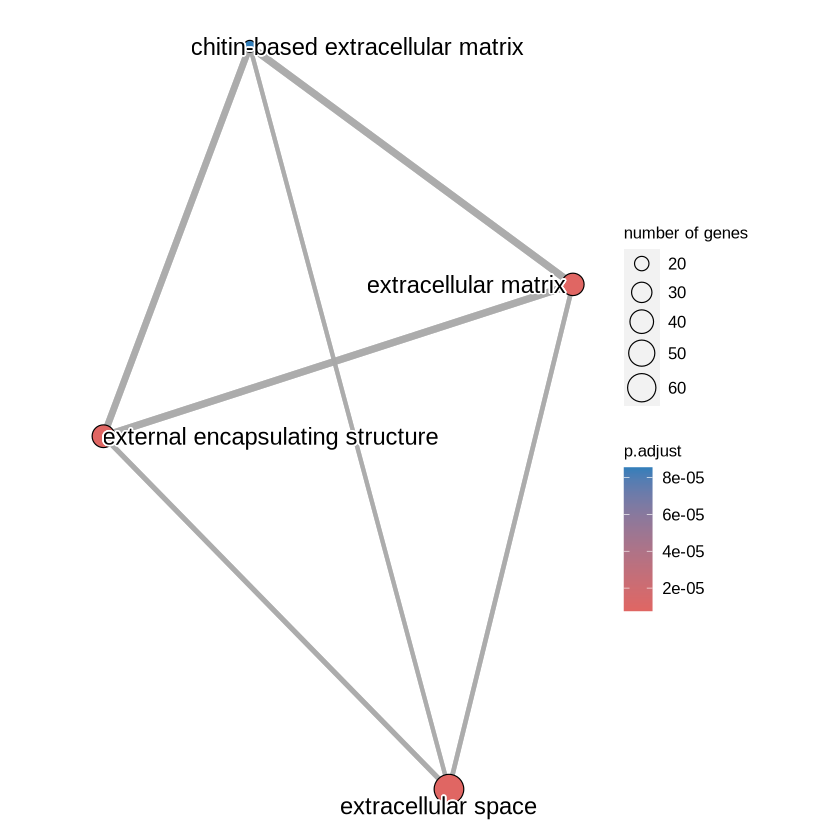

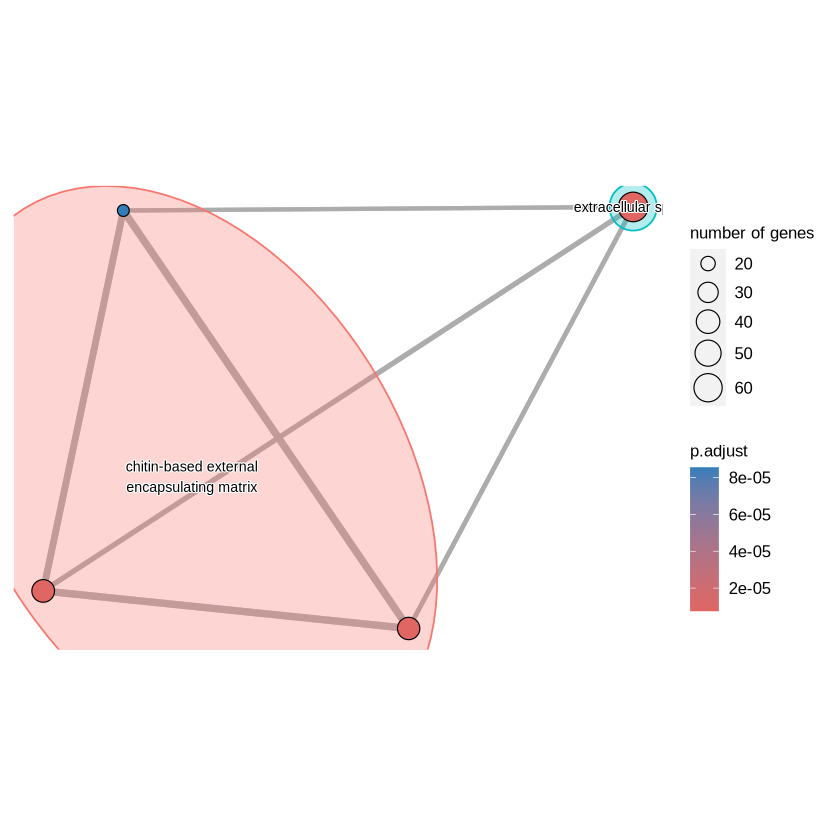

In [27]:
d <- godata('org.Dm.eg.db', ont="CC")
ego2 <- pairwise_termsim(egoBP, method="Wang", semData = d)
emapplot(ego2,showCategory = 8)
emapplot_cluster(ego2,showCategory =8)